<a href="https://colab.research.google.com/github/Anchaliya75/CU-BEMS-Research-Paper-Implementation/blob/main/LSTM_DAILY_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#for m in range(2, 25):
    #is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    #if is_seasonal:
        #print("There is seasonality of order {}.".format(period))

In [3]:
import  pandas as pd
import numpy as np


In [4]:
import torch 

In [5]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 45 kB 3.8 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641485 sha256=4fadae6cbdf993fb603dc30cc633a68e17f87b33ca8420412d3be856e89d3e36
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [6]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 370 kB 7.1 MB/s 
     |████████████████████████████████| 1.4 MB 57.3 MB/s 
     |████████████████████████████████| 793 kB 47.3 MB/s 
     |████████████████████████████████| 585 kB 27.1 MB/s 
     |████████████████████████████████| 9.8 MB 46.6 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 11.2 MB 58.8 MB/s 
     |████████████████████████████████| 179 kB 52.7 MB/s 
     |████████████████████████████████| 381 kB 73.4 MB/s 
     |████████████████████████████████| 930 kB 60.5 MB/s 
     |████████████████████████████████| 596 kB 67.8 MB/s 
     |████████████████████████████████| 419 kB 68.2 MB/s 
     |████████████████████████████████| 140 kB 71.2 MB/s 
     |████████████████████████████████| 1.1 MB 40.8 MB/s 
     |████████████████████████████████| 271 kB 56.2 MB/s 
     |███████████████████████████

In [7]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 7.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [8]:
from darts import TimeSeries

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [9]:
from darts import datasets

In [167]:
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2= MinMaxScaler()


In [11]:
plt.rcParams['figure.figsize'] = [12, 6]


In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('/content/Totalfloor1.csv')

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
data_set_per_month=df[264960:]

In [16]:
transformed_monthly_data=data_set_per_month.pivot_table(index = pd.Grouper(freq='M',key='Date'),values='Total')

In [17]:
transformed_monthly_data

,Total
Date,
2019-01-31,101.206014
2019-02-28,101.515552
2019-03-31,102.307803
2019-04-30,105.574679
2019-05-31,111.127309
2019-06-30,108.822106
2019-07-31,102.937581
2019-08-31,106.672899
2019-09-30,92.914951


In [18]:
transformed_monthly_data = transformed_monthly_data.reset_index()

In [19]:
transformed_monthly_data

,Date,Total
0,2019-01-31,101.206014
1,2019-02-28,101.515552
2,2019-03-31,102.307803
3,2019-04-30,105.574679
4,2019-05-31,111.127309
5,2019-06-30,108.822106
6,2019-07-31,102.937581
7,2019-08-31,106.672899
8,2019-09-30,92.914951
9,2019-10-31,99.770878


In [20]:
series = TimeSeries.from_dataframe(transformed_monthly_data, time_col="Date",value_cols="Total",fill_missing_dates =True ,freq='M')

In [21]:
series

<TimeSeries (DataArray) (Date: 12, component: 1, sample: 1)>
array([[[101.20601411]],

       [[101.51555208]],

       [[102.30780332]],

       [[105.5746787 ]],

       [[111.12730936]],

       [[108.82210556]],

       [[102.93758132]],

       [[106.67289897]],

       [[ 92.91495093]],

       [[ 99.77087791]],

       [[ 93.50092199]],

       [[ 95.92451456]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2019-01-31 2019-02-28 ... 2019-12-31
  * component  (component) object 'Total'
Dimensions without coordinates: sample

In [22]:
for m in range(2, 13):
    is_seasonal,period = check_seasonality(series, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

In [23]:
transformed_weekly_data=data_set_per_month.pivot_table(index = pd.Grouper(freq='W',key='Date'),values='Total')
transformed_daily_data=data_set_per_month.pivot_table(index = pd.Grouper(freq='D',key='Date'),values='Total')
transformed_hourly_data=data_set_per_month.pivot_table(index =pd.Grouper(freq='H',key ='Date'),values='Total')

In [24]:
transformed_weekly_data =transformed_weekly_data.reset_index()
transformed_daily_data =transformed_daily_data.reset_index()
transformed_hourly_data= transformed_hourly_data.reset_index()

# Dicky Fuller Test

In [162]:
from statsmodels.tsa.stattools import adfuller


In [163]:
adf = adfuller(transformed_daily_data["Total"])
print("p-value of Transformed_daily_data: {}".format(float(adf[1])))
adf = adfuller(transformed_weekly_data["Total"])
print("p-value of transformed_weekly_data: {}".format(float(adf[1])))
adf = adfuller(transformed_hourly_data["Total"])
print("p-value of transformed_hourly_data: {}".format(float(adf[1])))



p-value of Transformed_daily_data: 1.8153786065061088e-12
p-value of transformed_weekly_data: 7.644918740296623e-06
p-value of transformed_hourly_data: 8.794311037976177e-24


Not a Random **Walk**

In [25]:
series_weekly = TimeSeries.from_dataframe(transformed_weekly_data, time_col="Date",value_cols="Total",fill_missing_dates =True ,freq='W')
series_daily = TimeSeries.from_dataframe(transformed_daily_data, time_col="Date",value_cols="Total",fill_missing_dates =True ,freq='D')
series_hourly = TimeSeries.from_dataframe(transformed_daily_data, time_col="Date",value_cols="Total",fill_missing_dates =True ,freq='H')


In [26]:
for m in range(2, 365):
    is_seasonal,period = check_seasonality(series_daily, m=m,max_lag=366, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 8.
There is seasonality of order 13.
There is seasonality of order 18.
There is seasonality of order 21.
There is seasonality of order 26.
There is seasonality of order 31.
There is seasonality of order 36.
There is seasonality of order 39.
There is seasonality of order 44.
There is seasonality of order 49.
There is seasonality of order 56.
There is seasonality of order 59.
There is seasonality of order 61.
There is seasonality of order 65.
There is seasonality of order 67.
There is seasonality of order 70.
There is seasonality of order 74.
There is seasonality of order 80.
There is seasonality of order 85.
There is seasonality of order 87.
There is seasonality of order 93.
There is seasonality of order 98.
There is seasonality of order 100.
There is seasonality of order 106.
There is seasonality of order 111.
There is seasonality of order 122.
There is seasonality of order 135.
There is seasonality of order 142.
There is seasonality of order 154.
There is

In [27]:
for m in range(2, 8760):
    is_seasonal,period = check_seasonality(series_daily, m=m,max_lag=8760, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 8.
There is seasonality of order 13.
There is seasonality of order 18.
There is seasonality of order 21.
There is seasonality of order 26.
There is seasonality of order 31.
There is seasonality of order 36.
There is seasonality of order 39.
There is seasonality of order 44.
There is seasonality of order 49.
There is seasonality of order 56.
There is seasonality of order 59.
There is seasonality of order 61.
There is seasonality of order 65.
There is seasonality of order 67.
There is seasonality of order 70.
There is seasonality of order 74.
There is seasonality of order 80.
There is seasonality of order 85.
There is seasonality of order 87.
There is seasonality of order 93.
There is seasonality of order 98.
There is seasonality of order 100.
There is seasonality of order 106.
There is seasonality of order 111.
There is seasonality of order 122.
There is seasonality of order 135.
There is seasonality of order 142.
There is seasonality of order 154.
There is

In [28]:
for m in range(2, 53):
    is_seasonal,period = check_seasonality(series_weekly, m=m,max_lag=53, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 4.
There is seasonality of order 9.
There is seasonality of order 13.
There is seasonality of order 34.
There is seasonality of order 40.
There is seasonality of order 42.
There is seasonality of order 46.
There is seasonality of order 48.


In [29]:
 pip uninstall matplotlib


Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2


In [30]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.19.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


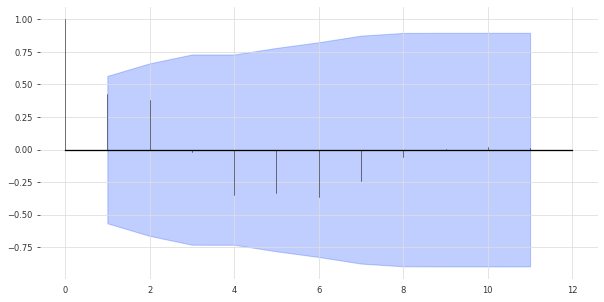

In [31]:
plot_acf(series, m=None, max_lag=11, alpha=0.05, bartlett_confint=True, fig_size=(10, 5), axis=None)

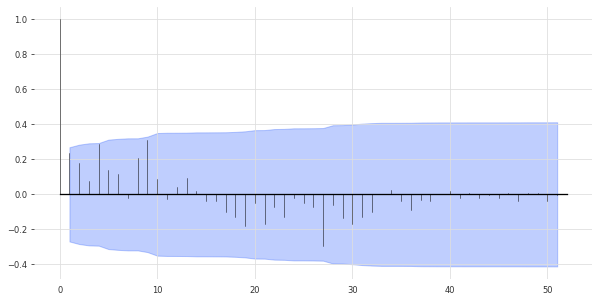

In [32]:
plot_acf(series_weekly, m=None, max_lag=51, alpha=0.05, bartlett_confint=True, fig_size=(10, 5), axis=None)

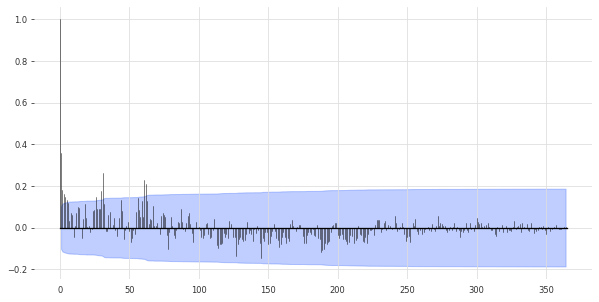

In [33]:
plot_acf(series_daily, m=None, max_lag=364, alpha=0.05, bartlett_confint=True, fig_size=(10, 5), axis=None)

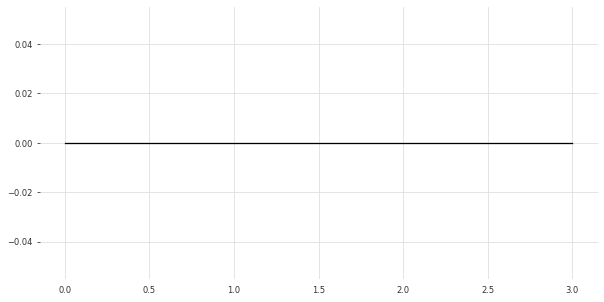

In [34]:
plot_acf(series_hourly, m=None, max_lag=2, alpha=0.05, bartlett_confint=True, fig_size=(10, 5), axis=None)

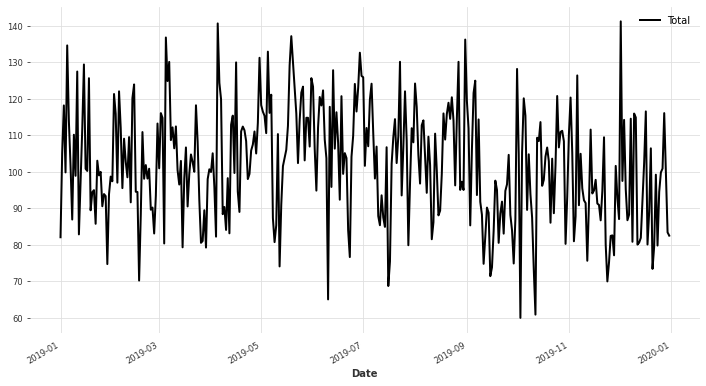

In [35]:
series_daily.plot()

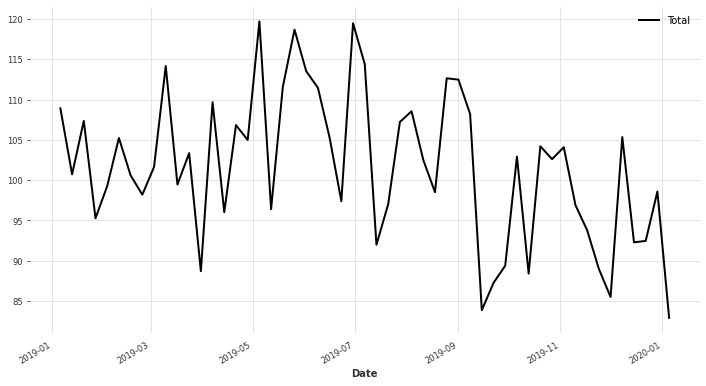

In [36]:
series_weekly.plot()

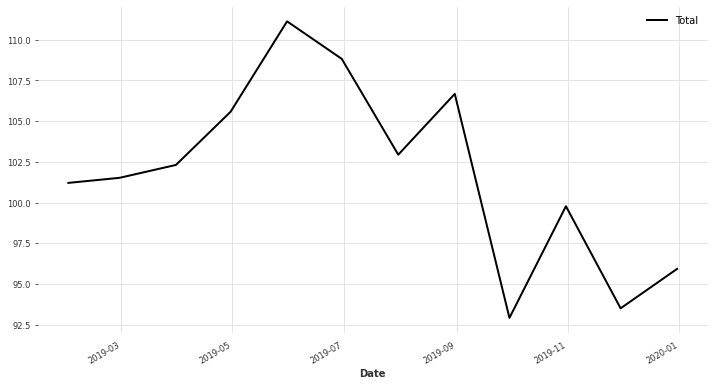

In [37]:
series.plot()

In [47]:
daily_data=transformed_daily_data
weekly_data=transformed_weekly_data
hourly_data=transformed_hourly_data

In [50]:
weekly_data.set_index("Date",inplace=True)


In [51]:
hourly_data_first_month_first_week =hourly_data[:98]
hourly_data_first_month=hourly_data[:720]

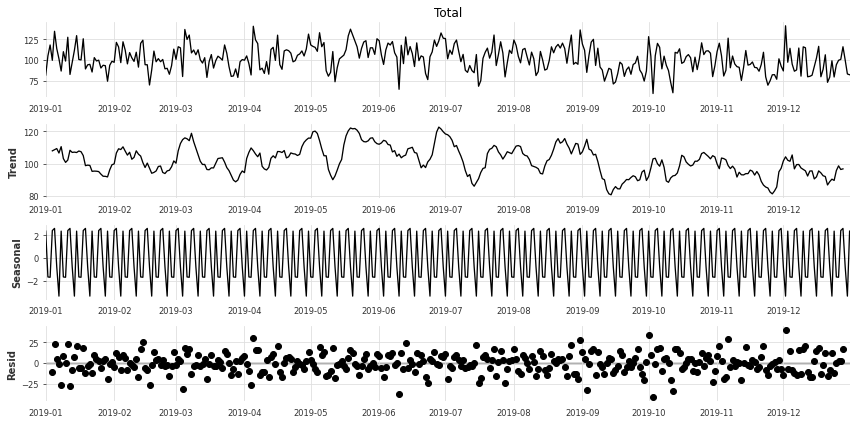

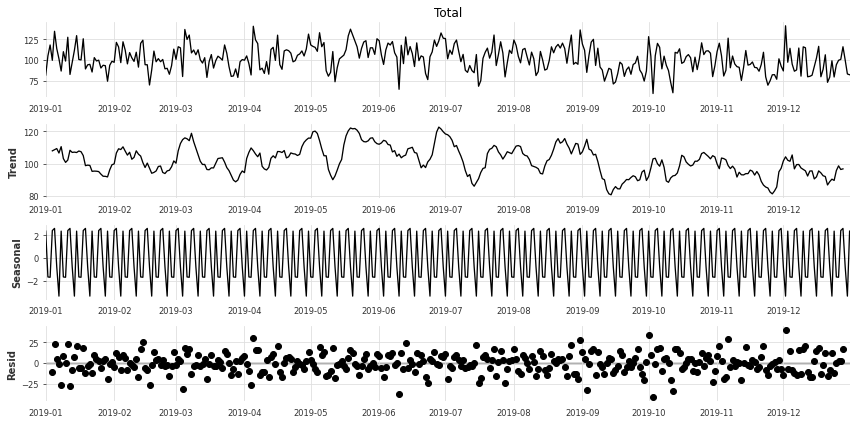

In [52]:
daily = seasonal_decompose(daily_data['Total'])
daily.plot()

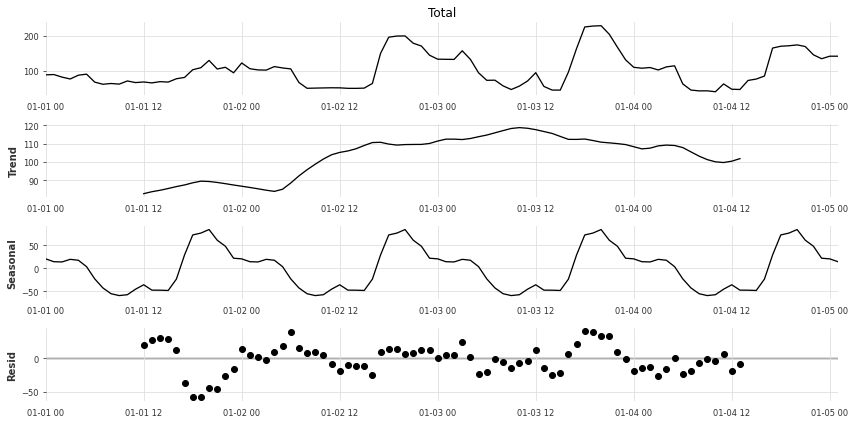

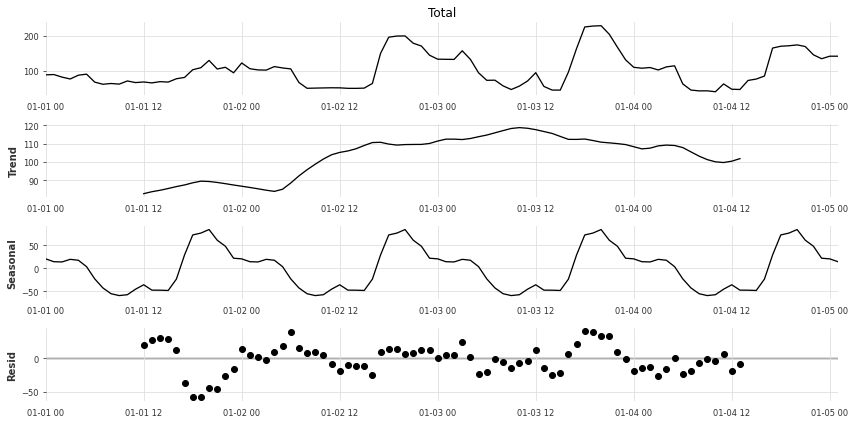

In [53]:
ho_fm_fw= seasonal_decompose(hourly_data_first_month_first_week['Total'])
ho_fm_fw.plot()

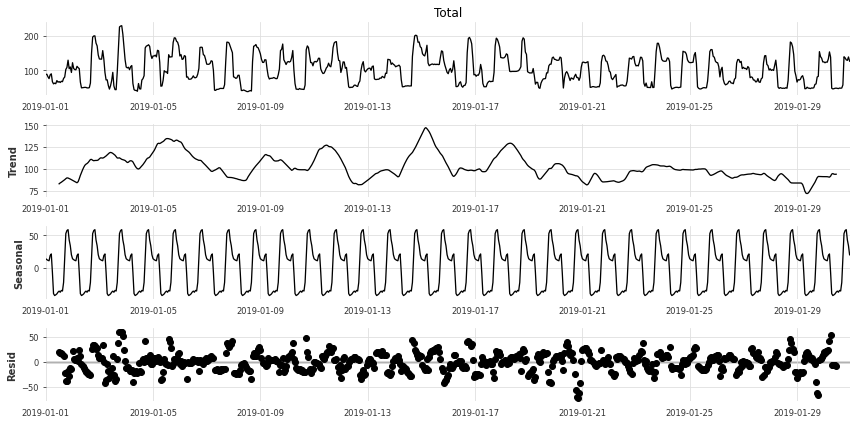

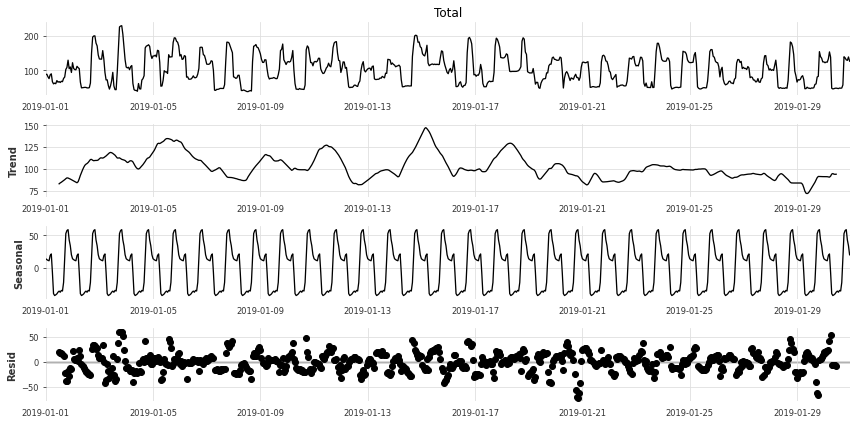

In [54]:

ho_fm= seasonal_decompose(hourly_data_first_month['Total'])
ho_fm.plot()

# LSTM ON Daily Data

In [164]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [169]:
transformed_daily_data.head()

,Total
Date,
2019-01-01,82.024104
2019-01-02,105.024729
2019-01-03,118.151340
2019-01-04,99.790653
2019-01-05,134.594986


In [171]:
train = transformed_daily_data.iloc[:335]
test = transformed_daily_data.iloc[335:]


In [173]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [174]:
scale.fit(train)
scaled_train = scale.transform(train)
scaled_test = scale.transform(test)

In [243]:
scaled_train.shape

(335, 1)

In [175]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [210]:
# define generator
n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [211]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.27384902 0.5588778  0.72154564 0.49401598 0.9253189  0.66872346
 0.51704167 0.33400111 0.62199404 0.48248269 0.83662847 0.28354929
 0.46342036 0.64196943 0.86062489 0.5065631  0.49900101 0.81397266
 0.36532562 0.42675738 0.4337762  0.31951073 0.53377116 0.48389859
 0.49586474 0.37905999 0.42045723 0.41363979 0.18272008 0.41997669]
Predict this y: 
 [[0.4798811]]


In [212]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

2022-06-09 12:56:31 tensorflow WARNING: Layer lstm_10 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
2022-06-09 12:56:31 tensorflow WARNING: Layer lstm_11 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


In [215]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 30, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_9 (Dense)             (None, 25)                2525      
                                                                 
 dense_10 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [230]:
model.fit(generator,epochs=50)


Epoch 1/50
305/305 [==============================] - 32s 105ms/step - loss: 0.0326
Epoch 2/50
305/305 [==============================] - 31s 103ms/step - loss: 0.0332
Epoch 3/50
305/305 [==============================] - 31s 103ms/step - loss: 0.0324
Epoch 4/50
305/305 [==============================] - 32s 104ms/step - loss: 0.0322
Epoch 5/50
305/305 [==============================] - 31s 100ms/step - loss: 0.0317
Epoch 6/50
305/305 [==============================] - 31s 102ms/step - loss: 0.0313
Epoch 7/50
305/305 [==============================] - 31s 101ms/step - loss: 0.0311
Epoch 8/50
305/305 [==============================] - 31s 100ms/step - loss: 0.0323
Epoch 9/50
305/305 [==============================] - 31s 103ms/step - loss: 0.0303
Epoch 10/50
305/305 [==============================] - 31s 101ms/step - loss: 0.0317
Epoch 11/50
305/305 [==============================] - 31s 101ms/step - loss: 0.0319
Epoch 12/50
305/305 [==============================] - 31s 100ms/step - lo

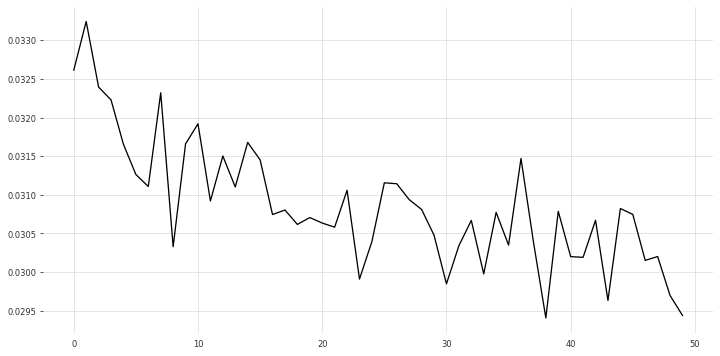

In [231]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [232]:
last_train_batch = scaled_train[-30:]

In [233]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))


In [234]:
model.predict(last_train_batch)


array([[0.37783355]], dtype=float32)

In [235]:
scaled_test[0]


array([1.0070461])

In [236]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [237]:
test_predictions


[array([0.37783355], dtype=float32),
 array([0.388133], dtype=float32),
 array([0.38709274], dtype=float32),
 array([0.39109817], dtype=float32),
 array([0.3933954], dtype=float32),
 array([0.39569387], dtype=float32),
 array([0.39737487], dtype=float32),
 array([0.39863005], dtype=float32),
 array([0.39946583], dtype=float32),
 array([0.39997497], dtype=float32),
 array([0.40023598], dtype=float32),
 array([0.40031844], dtype=float32),
 array([0.40028915], dtype=float32),
 array([0.40019673], dtype=float32),
 array([0.40007395], dtype=float32),
 array([0.39994708], dtype=float32),
 array([0.39983192], dtype=float32),
 array([0.39973575], dtype=float32),
 array([0.39966184], dtype=float32),
 array([0.39960894], dtype=float32),
 array([0.39957267], dtype=float32),
 array([0.39955583], dtype=float32),
 array([0.39954698], dtype=float32),
 array([0.39954445], dtype=float32),
 array([0.39954734], dtype=float32),
 array([0.39955366], dtype=float32),
 array([0.3995612], dtype=float32),
 arra

In [238]:
scaled_test

array([[1.0070461 ],
       [0.46504968],
       [0.67243295],
       [0.43645627],
       [0.33155537],
       [0.35081408],
       [0.67644898],
       [0.2584263 ],
       [0.69393242],
       [0.68062644],
       [0.24883094],
       [0.25555595],
       [0.27180353],
       [0.39805279],
       [0.5273476 ],
       [0.70121723],
       [0.24916673],
       [0.3591432 ],
       [0.57583087],
       [0.16638008],
       [0.24341244],
       [0.4863328 ],
       [0.24563314],
       [0.4278769 ],
       [0.4939313 ],
       [0.50730586],
       [0.69540976],
       [0.49799164],
       [0.29043635],
       [0.27927612]])

In [239]:
true_predictions = scale.inverse_transform(test_predictions)


In [240]:
test['Predictions'] = true_predictions



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [241]:
test.head()


,Total,Predictions
Date,,
2019-12-02,141.190028,90.415219
2019-12-03,97.453194,91.246340
2019-12-04,114.188153,91.162397
2019-12-05,95.145826,91.485618
2019-12-06,86.680764,91.670994


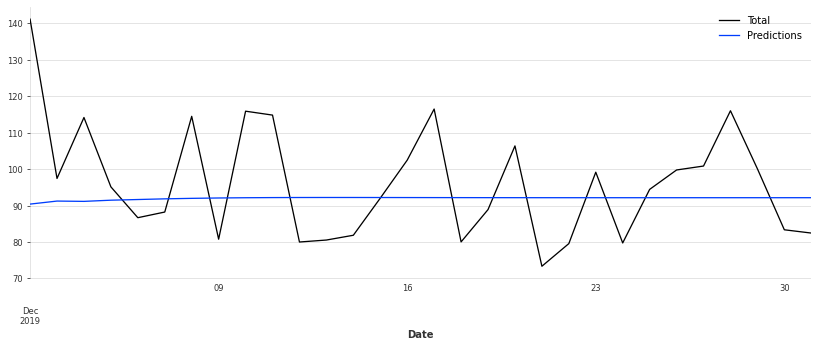

In [242]:
test.plot(figsize=(14,5))
